## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.003029  0.888752 -1.790021 -0.056014 -0.600696  1.391881
1  1.573099  1.043045  0.268142  1.822608  0.766126  1.422341
2  1.610082 -0.612838  0.359439  1.468310  0.292238  1.255162
3  0.885166  0.235222  1.379027 -0.637386  1.228738  1.280166
4  1.520328 -0.778653  0.142839 -0.381329  1.016822  0.147819


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9604614	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9518470	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9404297	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9316485	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9224202	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9126316	total: 72.3ms	remaining: 12s
6:	learn: 0.9014388	total: 72.9ms	remaining: 10.3s
7:	learn: 0.8912110	total: 73.3ms	remaining: 9.09s
8:	learn: 0.8828957	total: 73.8ms	remaining: 8.13s
9:	learn: 0.8720095	total: 74.3ms	remaining: 7.36s
10:	learn: 0.8634873	total: 74.9ms	remaining: 6.74s
11:	learn: 0.8522758	total: 75.6ms	remaining: 6.22s
12:	learn: 0.8430828	total: 76.2ms	remaining: 5.78s
13:	learn: 0.8333696	total: 76.7ms	remaining: 5.4s
14:	learn: 0.8259403	total: 77.2ms	remaining: 5.07s
15:	learn: 0.8173750	total: 77.6ms	remaining: 4.77s
16:	learn: 0.8097965	total: 78.1ms	remaining: 4.52s
17:	learn: 0.8010644	total: 78.7ms	remaining: 4.29s
18:	learn: 0.7934717	total: 79.3ms	remaining: 4

86:	learn: 0.4306961	total: 109ms	remaining: 1.15s
87:	learn: 0.4272786	total: 110ms	remaining: 1.14s
88:	learn: 0.4229917	total: 110ms	remaining: 1.13s
89:	learn: 0.4194208	total: 111ms	remaining: 1.12s
90:	learn: 0.4160419	total: 111ms	remaining: 1.11s
91:	learn: 0.4129605	total: 112ms	remaining: 1.1s
92:	learn: 0.4097802	total: 112ms	remaining: 1.09s
93:	learn: 0.4062492	total: 112ms	remaining: 1.08s
94:	learn: 0.4030650	total: 113ms	remaining: 1.07s
95:	learn: 0.4001910	total: 113ms	remaining: 1.06s
96:	learn: 0.3964078	total: 114ms	remaining: 1.06s
97:	learn: 0.3934032	total: 114ms	remaining: 1.05s
98:	learn: 0.3898175	total: 114ms	remaining: 1.04s
99:	learn: 0.3862764	total: 115ms	remaining: 1.03s
100:	learn: 0.3835797	total: 115ms	remaining: 1.03s
101:	learn: 0.3808658	total: 116ms	remaining: 1.02s
102:	learn: 0.3774752	total: 116ms	remaining: 1.01s
103:	learn: 0.3747135	total: 117ms	remaining: 1s
104:	learn: 0.3721328	total: 117ms	remaining: 997ms
105:	learn: 0.3695821	total: 1

252:	learn: 0.1507583	total: 188ms	remaining: 554ms
253:	learn: 0.1504838	total: 188ms	remaining: 552ms
254:	learn: 0.1498006	total: 189ms	remaining: 551ms
255:	learn: 0.1495098	total: 189ms	remaining: 549ms
256:	learn: 0.1482385	total: 190ms	remaining: 548ms
257:	learn: 0.1479477	total: 190ms	remaining: 546ms
258:	learn: 0.1476180	total: 190ms	remaining: 545ms
259:	learn: 0.1469232	total: 191ms	remaining: 543ms
260:	learn: 0.1460940	total: 191ms	remaining: 542ms
261:	learn: 0.1450822	total: 192ms	remaining: 540ms
262:	learn: 0.1446445	total: 192ms	remaining: 538ms
263:	learn: 0.1437592	total: 193ms	remaining: 537ms
264:	learn: 0.1430601	total: 193ms	remaining: 535ms
265:	learn: 0.1426206	total: 193ms	remaining: 534ms
266:	learn: 0.1417238	total: 194ms	remaining: 532ms
267:	learn: 0.1414873	total: 194ms	remaining: 531ms
268:	learn: 0.1412393	total: 195ms	remaining: 530ms
269:	learn: 0.1405062	total: 195ms	remaining: 528ms
270:	learn: 0.1396201	total: 196ms	remaining: 526ms
271:	learn: 

475:	learn: 0.0589499	total: 293ms	remaining: 323ms
476:	learn: 0.0587738	total: 294ms	remaining: 322ms
477:	learn: 0.0584813	total: 294ms	remaining: 321ms
478:	learn: 0.0583092	total: 295ms	remaining: 321ms
479:	learn: 0.0581401	total: 295ms	remaining: 320ms
480:	learn: 0.0579074	total: 296ms	remaining: 319ms
481:	learn: 0.0575870	total: 296ms	remaining: 318ms
482:	learn: 0.0574226	total: 297ms	remaining: 318ms
483:	learn: 0.0572969	total: 297ms	remaining: 317ms
484:	learn: 0.0569407	total: 298ms	remaining: 316ms
485:	learn: 0.0566823	total: 298ms	remaining: 315ms
486:	learn: 0.0564600	total: 298ms	remaining: 314ms
487:	learn: 0.0561525	total: 299ms	remaining: 314ms
488:	learn: 0.0559968	total: 299ms	remaining: 313ms
489:	learn: 0.0557999	total: 300ms	remaining: 312ms
490:	learn: 0.0554905	total: 300ms	remaining: 311ms
491:	learn: 0.0551969	total: 301ms	remaining: 311ms
492:	learn: 0.0548741	total: 301ms	remaining: 310ms
493:	learn: 0.0547081	total: 302ms	remaining: 309ms
494:	learn: 

645:	learn: 0.0280479	total: 371ms	remaining: 203ms
646:	learn: 0.0278818	total: 372ms	remaining: 203ms
647:	learn: 0.0277378	total: 372ms	remaining: 202ms
648:	learn: 0.0276152	total: 373ms	remaining: 202ms
649:	learn: 0.0274530	total: 373ms	remaining: 201ms
650:	learn: 0.0272942	total: 374ms	remaining: 200ms
651:	learn: 0.0272177	total: 374ms	remaining: 200ms
652:	learn: 0.0270626	total: 375ms	remaining: 199ms
653:	learn: 0.0269894	total: 375ms	remaining: 198ms
654:	learn: 0.0269146	total: 376ms	remaining: 198ms
655:	learn: 0.0267914	total: 376ms	remaining: 197ms
656:	learn: 0.0266373	total: 376ms	remaining: 197ms
657:	learn: 0.0265658	total: 377ms	remaining: 196ms
658:	learn: 0.0264929	total: 377ms	remaining: 195ms
659:	learn: 0.0263371	total: 378ms	remaining: 195ms
660:	learn: 0.0262047	total: 379ms	remaining: 194ms
661:	learn: 0.0260906	total: 379ms	remaining: 193ms
662:	learn: 0.0259598	total: 379ms	remaining: 193ms
663:	learn: 0.0258577	total: 380ms	remaining: 192ms
664:	learn: 

869:	learn: 0.0112453	total: 476ms	remaining: 71.1ms
870:	learn: 0.0112135	total: 477ms	remaining: 70.6ms
871:	learn: 0.0111774	total: 477ms	remaining: 70ms
872:	learn: 0.0111615	total: 477ms	remaining: 69.5ms
873:	learn: 0.0111303	total: 478ms	remaining: 68.9ms
874:	learn: 0.0111019	total: 478ms	remaining: 68.3ms
875:	learn: 0.0110724	total: 479ms	remaining: 67.8ms
876:	learn: 0.0110374	total: 479ms	remaining: 67.2ms
877:	learn: 0.0110221	total: 480ms	remaining: 66.7ms
878:	learn: 0.0109915	total: 480ms	remaining: 66.1ms
879:	learn: 0.0109766	total: 481ms	remaining: 65.6ms
880:	learn: 0.0109528	total: 481ms	remaining: 65ms
881:	learn: 0.0109227	total: 482ms	remaining: 64.5ms
882:	learn: 0.0108886	total: 482ms	remaining: 63.9ms
883:	learn: 0.0108634	total: 483ms	remaining: 63.4ms
884:	learn: 0.0108387	total: 484ms	remaining: 62.9ms
885:	learn: 0.0108046	total: 484ms	remaining: 62.3ms
886:	learn: 0.0107750	total: 485ms	remaining: 61.8ms
887:	learn: 0.0107414	total: 485ms	remaining: 61.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

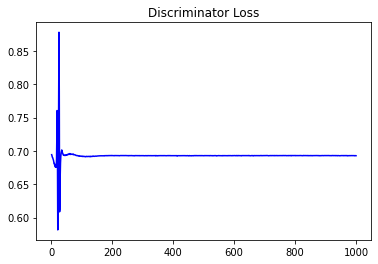

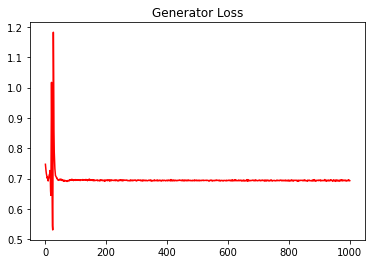

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0661446011986699


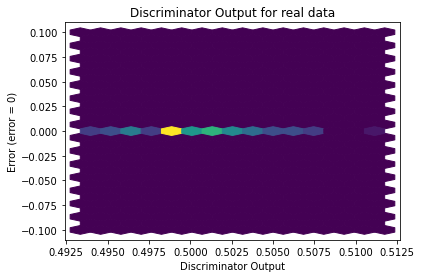

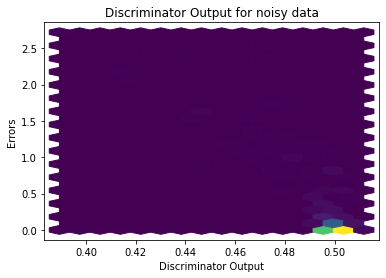

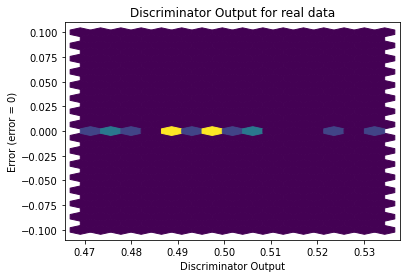

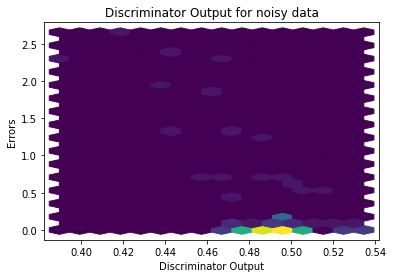

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


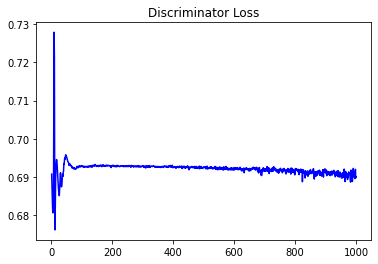

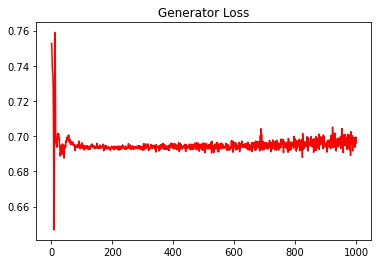

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14385508477081577


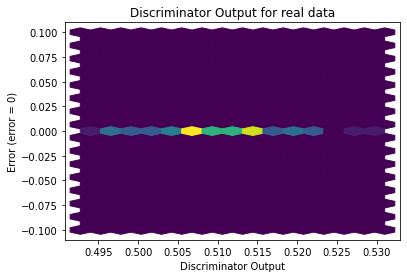

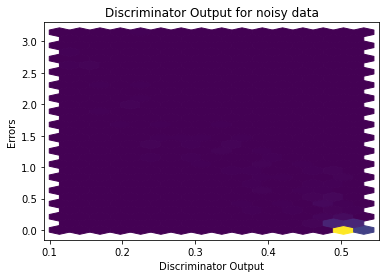

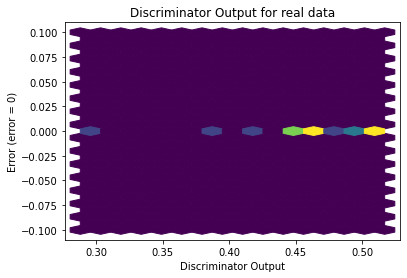

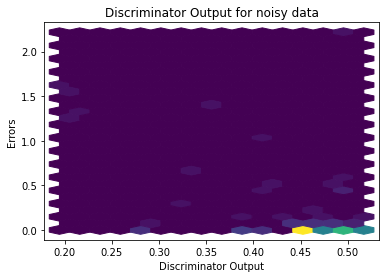

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3548]], requires_grad=True)
